# Investigate the velocity driven tracer transport

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts
import Atmos_tools as Ats

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
#import cartopy.feature
#import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from NEMO_tools import reporj_NEMOgrid
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [4]:
coordinate_name=glob.glob('../../_data/Exchange/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

In [5]:
def seasonal_cycle(data):
    out = np.empty([12, np.size(data, 1), np.size(data, 2)])
    for mon in range(12):
        out[mon, :, :] = np.nanmean(data[mon:len(data):12, :, :], 0)
    return out
def seasonal_decomp3d(data):
    anom = np.empty(data.shape)
    for mon in range(12):
        temp_data = np.nanmean(data[mon:len(data):12, :, :], 0)
        anom[mon:len(data):12, :, :] = data[mon:len(data):12, :, :]-temp_data
    return anom

# Variables

## Mask file

In [6]:
MAT = scipy.io.loadmat('../../_data/Mask files/velocity_driven_transport_mask.mat')
vdt_mask = MAT['mask_arctic'][:]
lon_mask = MAT['lon'][:]
lat_mask = MAT['lat'][:]

In [7]:
mask_interp = reporj_NEMOgrid(lon_mask, lat_mask, vdt_mask, nav_lon, nav_lat, method='nearest')
mask_range = reporj_NEMOgrid(lon_mask, lat_mask, vdt_mask, nav_lon, nav_lat, method='linear')
mask_interp[np.isnan(mask_range)] = np.nan
mask_plot = np.ma.masked_where(np.isnan(mask_interp), mask_interp)

## SLP

In [8]:
year = np.arange(2002, 2014)
#u10 = np.empty([144, 368, 801])
#v10 = np.empty([144, 368, 801])
slp = np.empty([144, 368, 801])
for i in range(12):
#    name_u = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*u*'+str(year[i])+'*monmean*')
#    name_v = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*v*'+str(year[i])+'*monmean*')
    name_slp = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*slp*'+str(year[i])+'*monmean*')
#    u_obj = nc.Dataset(name_u[0])
#    v_obj = nc.Dataset(name_v[0])
    slp_obj = nc.Dataset(name_slp[0])
#    u10[i*12:(i+1)*12, :, :] = u_obj.variables['u_wind'][:, :, :]
#    v10[i*12:(i+1)*12, :, :] = v_obj.variables['v_wind'][:, :, :]
    slp[i*12:(i+1)*12, :, :] = slp_obj.variables['atmpres'][:, :, :]

In [9]:
x = slp_obj.variables['LON'][:]
y = slp_obj.variables['LAT'][:]
[lon, lat] = np.meshgrid(x, y)

In [10]:
slp_np = slp[:, y>20, :]
lon_np = lon[y>20, :]
lat_np = lat[y>20, :]

## Zonal/Meridional Currents

In [6]:
UName = sorted(glob.glob('../../_data/MAT files/vozocrtx_by_month/vozocrtx*mat'))
VName = sorted(glob.glob('../../_data/MAT files/vomecrty_by_month/vomecrty*mat'))

In [7]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_boundary_ANHA4.mat')
domain = MAT['domain'][:].T

In [8]:
vozocrtx0 = np.zeros([144, 800, 544])
vomecrty0 = np.zeros([144, 800, 544])
vozocrtx1 = np.zeros([144, 800, 544])
vomecrty1 = np.zeros([144, 800, 544])

for i in range(144):
    #
    print(i)
    UMAT = scipy.io.loadmat(UName[i])
    vz = UMAT['vozocrtx'][:]
    vz[vz>1e7] = np.nan
    vz0 = np.nanmean(vz[:23, :, :], 0)
    vozocrtx0[i, :, :] = vz0
    vz1 = np.nanmean(vz[23:27, :, :], 0)
    vozocrtx1[i, :, :] = vz1
    print('zonal')
    #
    VMAT = scipy.io.loadmat(VName[i])
    vm = VMAT['vomecrty'][:]
    vm[vm>1e7] = np.nan
    vm0 = np.nanmean(vm[:23, :, :], 0)
    vomecrty0[i, :, :] = vm0
    vm1 = np.nanmean(vm[23:27, :, :], 0)
    vomecrty1[i, :, :] = vm1
    print('meridional')

0
zonal
meridional
1
zonal
meridional
2
zonal
meridional
3
zonal
meridional
4
zonal
meridional
5
zonal
meridional
6
zonal
meridional
7
zonal
meridional
8
zonal
meridional
9
zonal
meridional
10
zonal
meridional
11
zonal
meridional
12
zonal
meridional
13
zonal
meridional
14
zonal
meridional
15
zonal
meridional
16
zonal
meridional
17
zonal
meridional
18
zonal
meridional
19
zonal
meridional
20
zonal
meridional
21
zonal
meridional
22
zonal
meridional
23
zonal
meridional
24
zonal
meridional
25
zonal
meridional
26
zonal
meridional
27
zonal
meridional
28
zonal
meridional
29
zonal
meridional
30
zonal
meridional
31
zonal
meridional
32
zonal
meridional
33
zonal
meridional
34
zonal
meridional
35
zonal
meridional
36
zonal
meridional
37
zonal
meridional
38
zonal
meridional
39
zonal
meridional
40
zonal
meridional
41
zonal
meridional
42
zonal
meridional
43
zonal
meridional
44
zonal
meridional
45
zonal
meridional
46
zonal
meridional
47
zonal
meridional
48
zonal
meridional
49
zonal
meridional
50
zonal
m

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [9]:
save_var = {'vozocrtx0':vozocrtx0, 'vomecrty0':vomecrty0,
            'vozocrtx1':vozocrtx1, 'vomecrty1':vomecrty1}
scipy.io.savemat('../../_data/Exchange/UV_current_new.mat', mdict=save_var)

In [15]:
MAT = scipy.io.loadmat('../../_data/Exchange/UV_current.mat')
vozocrtx0 = MAT['vozocrtx0'][:]
vozocrtx1 = MAT['vozocrtx1'][:]
vomecrty0 = MAT['vomecrty0'][:]
vomecrty1 = MAT['vomecrty1'][:]

In [16]:
u_mean = np.nanmean(vozocrtx0, 0)
v_mean = np.nanmean(vomecrty0, 0)

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [17]:
sp_mean = np.sqrt(u_mean*u_mean+v_mean*v_mean)
u_mean = u_mean/sp_mean
v_mean = v_mean/sp_mean

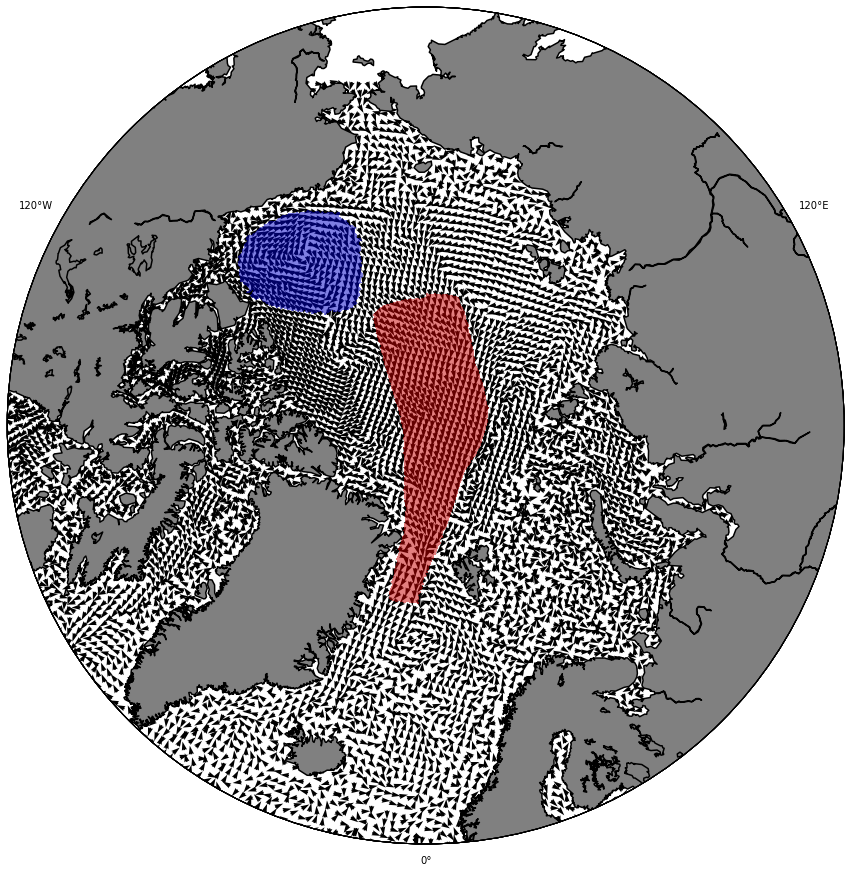

In [18]:
n=4
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
proj.quiver(x[::n, ::n], y[::n, ::n], u_mean[::n, ::n], v_mean[::n, ::n], scale=95)
proj.contourf(x, y, mask_interp, alpha=0.5)

# Transpolar drift

## Question: how to estimate the intensity of transpolar drift

(X) **V component heading south**


(X) **Projecting 2d ocean currents to the direction of Fram Strait ($\mathrm{lon = -5.5^\circ}$)**

If define the direction of current as $\theta$, then:

$$
u = \sqrt{u^2 + v^2}\cos{\theta} \\
v = \sqrt{u^2 + v^2}\sin{\theta}
$$

The component on the direction of Fram Strait can be calculated as:

$$
\vec{v_0} = \sqrt{u^2 + v^2}\cos{(-5.5^\circ - \theta)} = u\cdot \cos{(-5.5^\circ)} + v\cdot \sin{(-5.5^\circ)}
$$

(V) **Speed**

In [57]:
u_tpd = vozocrtx0[:, mask_interp==2]
v_tpd = vomecrty0[:, mask_interp==2]
vdt = np.abs(np.nanmean(np.sqrt(u_tpd*u_tpd+v_tpd*v_tpd), 1))
#
#vdt_grid = u_tpd*np.cos(-5.5/180*np.pi) + v_tpd*np.sin(-5.5/180*np.pi)
#vdt = np.abs(np.nanmean(vdt_grid, 1))

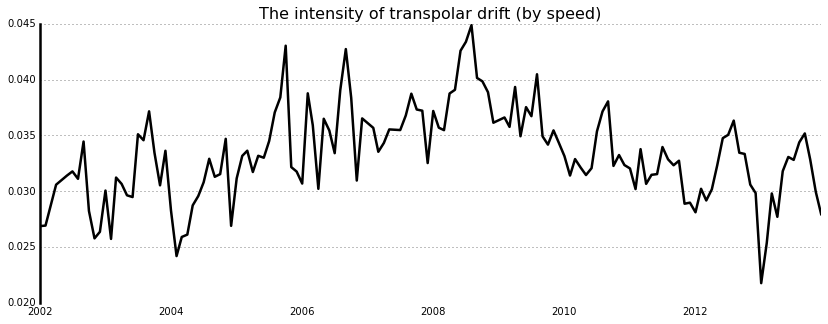

In [73]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca()

ax.grid(linestyle=':')
ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.set_xlim([date_list[0], date_list[143]])
#ax.set_ylim([0, 0.004])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="on", left="off", right="off", labelleft="on")

ax.plot(date_list, vdt, 'k-', lw=2.5)
ax.set_title('The intensity of transpolar drift (by speed)', fontsize=16)

## Intensity of transpolar drift v.s. SLP

In [59]:
from scipy.stats.stats import pearsonr

In [60]:
corr = np.zeros([233, 801])
p = np.zeros([233, 801])

for i in range(233):
    for j in range(801):
        corr[i, j], p[i, j]=pearsonr(slp_np[:, i, j], vdt)

In [63]:
lev_corr = np.array([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
lev_corr_line = np.array([-0.5, -0.3, -0.1, 0, 0.1, 0.3, 0.5])

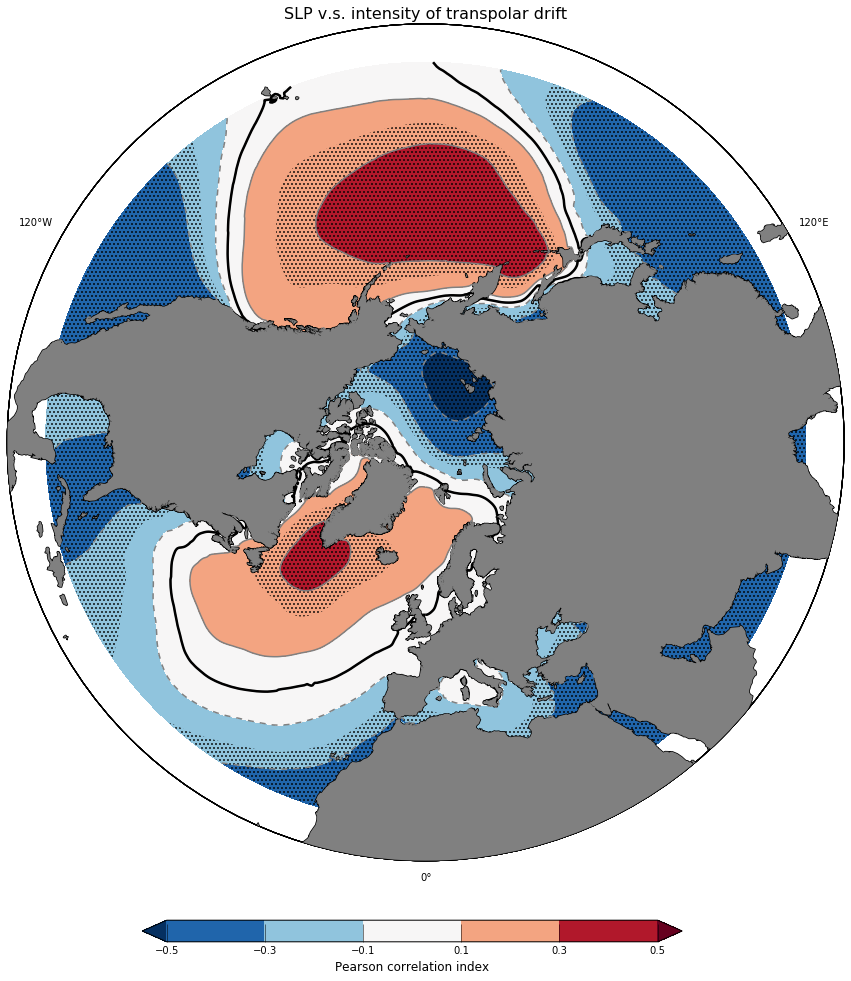

In [64]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=15, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(lon_np, lat_np)
CS = proj.contourf(x, y, corr, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, corr, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x, y, corr, [0], colors=('k',), linewidths=2.5)
proj.contourf(x, y, p, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('SLP v.s. intensity of transpolar drift', fontsize=16)

## Intensity of transpolar drift v.s. $\mathrm{Ba_d}$ (replaced by EOF 2nd mode)

In [44]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BASE01_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName)
Ba = ptrc_obj.variables['Ba'][:, :20, :, :]
Ba[Ba==0]=np.nan
Ba = np.nanmean(Ba, 1)

In [45]:
Ba_np = Ba[:, 350:, :]

In [46]:
Ba_anom = seasonal_decomp3d(Ba_np)

In [47]:
Ba_anom.shape

(144, 450, 544)

In [65]:
corrBa = np.zeros([450, 544])
pBa = np.zeros([450, 544])
for i in range(450):
    for j in range(544):
        corrBa[i, j], pBa[i, j]=pearsonr(Ba_np[:, i, j], vdt[:])

In [66]:
lev_corr = np.array([-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
lev_corr_line = np.array([-0.5, -0.3, -0.1, 0, 0.1, 0.3, 0.5])

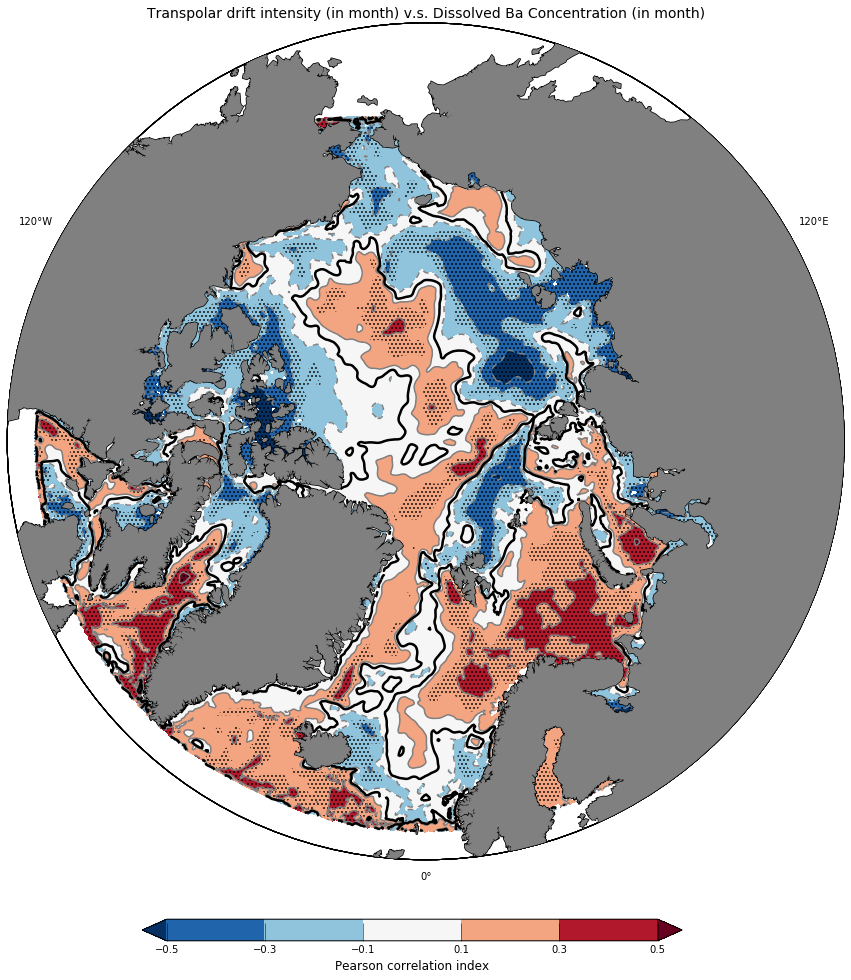

In [67]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=58, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS = proj.contourf(x[350:, :], y[350:, :], corrBa, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x[350:, :], y[350:, :], corrBa, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x[350:, :], y[350:, :], corrBa, [0], colors=('k',), linewidths=2.5)
proj.contourf(x[350:, :], y[350:, :], pBa, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('Transpolar drift intensity (in month) v.s. Dissolved Ba Concentration (in month)', fontsize=14)

## How transpolar drift affects the tracer transport

In [68]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_flux_param.mat')

#            'fake_xgridFS':fake_xgridFS, 'dgridFS':dgridFS,
#            'fake_xgridBB':fake_xgridBB, 'dgridBB':dgridBB
#           }
#scipy.io.savemat('../../_data/Exchange/Ba_flux_param.mat', mdict=save_var)


Ba_fluxFS_n = MAT['Ba_fluxFS_n'][:]
Ba_fluxFS_s = np.abs(MAT['Ba_fluxFS_s'][:])
Ba_fluxBB_n = MAT['Ba_fluxBB_n'][:]
Ba_fluxBB_s = np.abs(MAT['Ba_fluxBB_s'][:])

fake_xgridFS = MAT['fake_xgridFS'][:]
fake_xgridBB = MAT['fake_xgridBB'][:]
dgridFS = MAT['dgridFS'][:]
dgridBB = MAT['dgridBB'][:]

xzFS = MAT['xzFS'][:]
xzBB = MAT['xzBB'][:]

Ba_fluxFS = Ba_fluxFS_n+Ba_fluxFS_s
Ba_fluxBB = Ba_fluxBB_n+Ba_fluxBB_s

In [69]:
Ba_fluxFS_n.shape

(144, 50, 148)

In [70]:
TF_FS_n = np.nansum(np.nansum(Ba_fluxFS_n[:, :20, :]*xzFS[:20, :], 1), 1)
TF_FS_s = np.nansum(np.nansum(Ba_fluxFS_s[:, :20, :]*xzFS[:20, :], 1), 1)
TF_BB_n = np.nansum(np.nansum(Ba_fluxBB_n[:, :20, :]*xzBB[:20, :], 1), 1)
TF_BB_s = np.nansum(np.nansum(Ba_fluxBB_s[:, :20, :]*xzBB[:20, :], 1), 1)

**TPD v.s. Fram Strait south (d>65m)**

In [71]:
pearsonr(vdt,TF_FS_s)

(0.2119446345210132, 0.010765803711610166)

**TPD v.s. Baffin Bay (CAA) south (d>65m)**

In [72]:
pearsonr(vdt,TF_BB_s)

(-0.28484969417273776, 0.00053941755433688655)

# Beaufort Gyre

## The intensity of Beaufort Gyre
** (X) Vorticity **
$$
\zeta = \frac{\Delta v}{\Delta x} - \frac{\Delta u}{\Delta y} + \frac{u}{R}tan(lat)
$$

$$
\Delta x = e1t \\
\Delta y = e2t
$$

** (V) Sea surface height **

In [107]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
e1t = coordinate_obj.variables['e1t'][:]
e2t = coordinate_obj.variables['e2t'][:]
e3t = coordinate_obj.variables['e3t_0'][:]

In [108]:
#u_mean = np.nanmean(vozocrtx0, 0)
#v_mean = np.nanmean(vomecrty0, 0)

In [109]:
#_, duy_mean = Ats.central_diff(u_mean)
#dvx_mean, _ = Ats.central_diff(v_mean)
#zeta_mean = dvx_mean/e1t - duy_mean/e2t + u_mean/6.371e6*np.tan(nav_lat)

In [110]:
#sp_mean = np.sqrt(u_mean*u_mean+v_mean*v_mean)
#u_mean = u_mean/sp_mean
#v_mean = v_mean/sp_mean

In [111]:
#lev_curl = np.array([-5, -3, -1, 1, 3, 5])

In [141]:
#n=4
#fig = plt.figure(figsize=(15, 15))
#ax = fig.gca()
#proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
#proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
#proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
#proj.drawcoastlines(linewidth=1.5, color='k')
#x, y = proj(nav_lon, nav_lat)
#proj.contourf(x, y, zeta_mean[0, :, :]*1e7, lev_curl, cmap=plt.cm.RdBu_r, extend='both')
#proj.quiver(x[::n, ::n], y[::n, ::n], u_mean[::n, ::n], v_mean[::n, ::n], scale=95)
##proj.contourf(x, y, mask_interp, alpha=0.5)

In [114]:
H_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/sossheig_monmean.nc'
h_obj = nc.Dataset(H_FName)
SSH = h_obj.variables['sossheig'][:, :, :]

In [131]:
SSH_BG = np.nanmax(SSH[:, mask_interp==1], 1) + 0.4

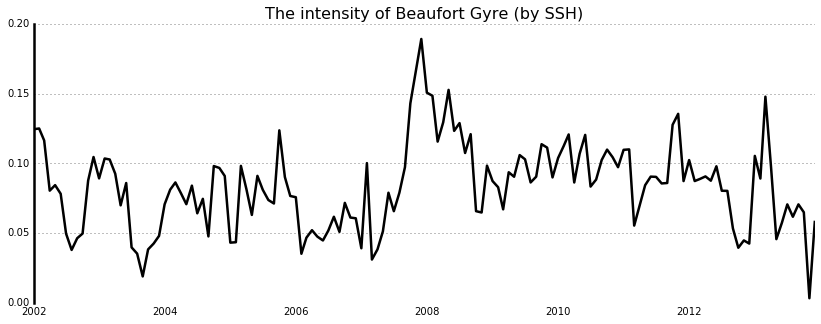

In [132]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca()

ax.grid(linestyle=':')
ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.set_xlim([date_list[0], date_list[143]])
#ax.set_ylim([0, 0.004])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="on", left="off", right="off", labelleft="on")

ax.plot(date_list, SSH_BG, 'k-', lw=2.5)
ax.set_title('The intensity of Beaufort Gyre (by SSH)', fontsize=16)

In [133]:
corrBG = np.zeros([233, 801])
pBG = np.zeros([233, 801])

for i in range(233):
    for j in range(801):
        corrBG[i, j], pBG[i, j]=pearsonr(slp_np[:, i, j], SSH_BG)

In [134]:
np.nanmax(corrBG)

0.39705378728403684

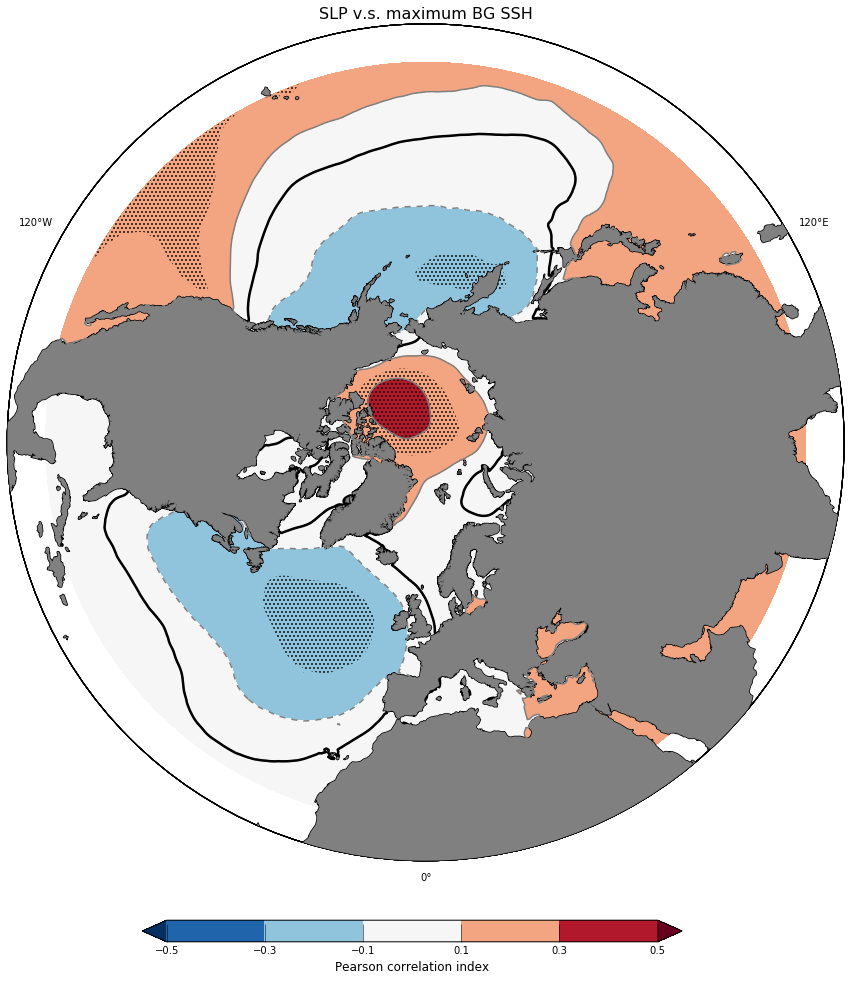

In [135]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=15, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(lon_np, lat_np)
CS = proj.contourf(x, y, corrBG, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, corrBG, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x, y, corrBG, [0], colors=('k',), linewidths=2.5)
proj.contourf(x, y, pBG, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('SLP v.s. maximum BG SSH', fontsize=16)

In [136]:
corrBaBG = np.zeros([450, 544])
pBaBG = np.zeros([450, 544])
for i in range(450):
    for j in range(544):
        corrBaBG[i, j], pBaBG[i, j]=pearsonr(Ba_np[:, i, j], SSH_BG[:])

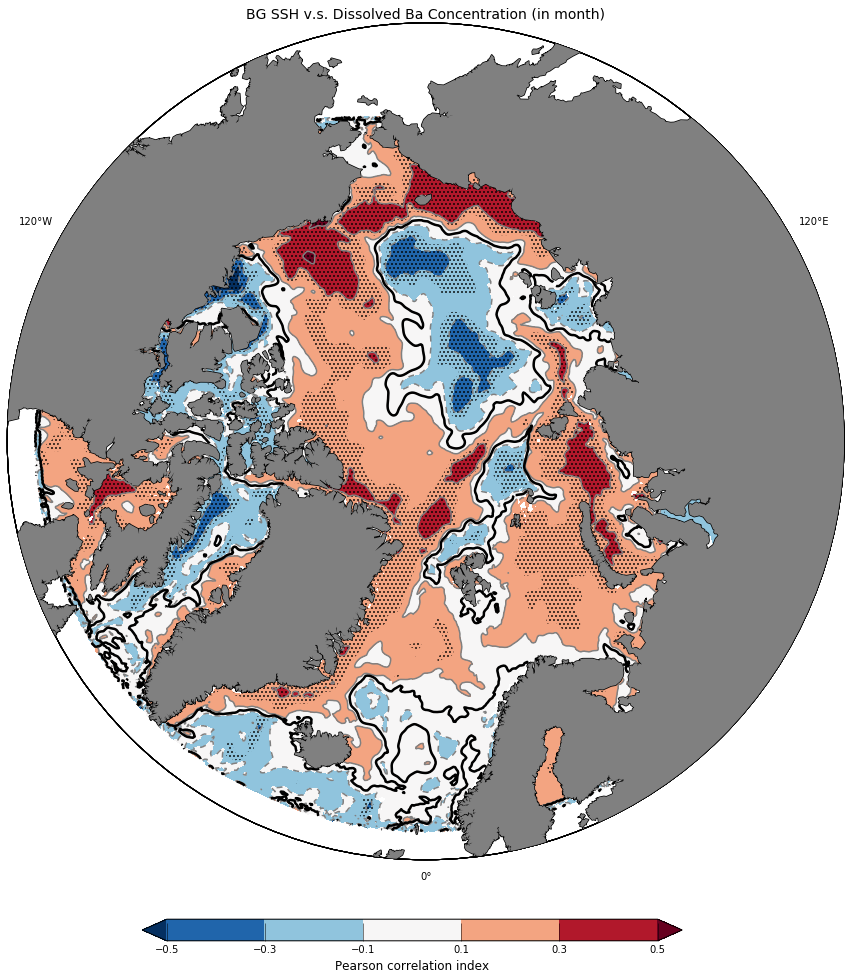

In [138]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=58, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=4)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS = proj.contourf(x[350:, :], y[350:, :], corrBaBG, lev_corr, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x[350:, :], y[350:, :], corrBaBG, lev_corr_line, colors=('gray',), linewidths=1.5)
proj.contour(x[350:, :], y[350:, :], corrBaBG, [0], colors=('k',), linewidths=2.5)
proj.contourf(x[350:, :], y[350:, :], pBaBG, [0.01, 0.1], colors='none', hatches=['...', ''], extend='min')

cax  = fig.add_axes([0.25, 0.05, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Pearson correlation index', fontsize=12)
CBar.ax.tick_params(axis='x', length=18)
CBar.set_ticks(lev_corr)

ax.set_title('BG SSH v.s. Dissolved Ba Concentration (in month)', fontsize=14)

In [139]:
pearsonr(SSH_BG,TF_FS_s)

(0.13663680842147577, 0.10246482104639063)

In [140]:
pearsonr(SSH_BG,TF_BB_s)

(-0.31880329158298304, 9.8436262296201961e-05)